🎁 'Data analysis' 와 관련된 키워드를 도출하여 분석하고 Tableau로 시각화 합니다.  
> 1) 영문 데이터에서 분석할 특징(feature)을 선정  
  2) 데이터를 벡터 형태로 변환  
  3) 분석 기법을 적용하여 필요한 정보를 추출  
  4) 키워드 시각화  
  

**텍스트 분석 종류**  
- text classification(텍스트 분류)
- test clustering(텍스트 군집화)
- sentiment analysis(감성 분석)



# Data acquisition

데이터 수집 : http://www.riss.kr/index.do#search

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#필요한 패키지 임포트

import pandas as pd
import glob 
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS,WordCloud

'''
glob : 경로와 이름을 지정하여 파일을 처리하는 모듈( 데이터 병합 )
re : 메타 문자를 지정하여 특정 규칙 작성(정규식 사용)
reduce : 2차원 리스트를 1차원으로 줄이기 위한 모듈
word_tokenize : 자연어 처리 패키지중 토큰화 작업을 위한 모듈
stopwords : 자연어 처리 패키지중 불용어 정보를 제공
WordNetLemmatizer : 단어 형태의 일반화를 위해 표제어 추출을 제공
Counter : 데이터 집합에서 갯수 자동으로 계산
stopwords, wordcloud : 워드클라우드를 그리기 위해 사용할 워드클라우드용 불용어 모듈과 워드클라우드 모듈
'''

#데이터를 리스트에 저장
all_files = glob.glob('/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData*.xls')
all_files

['/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData.xls',
 '/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData (1).xls',
 '/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData (2).xls',
 '/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData (3).xls',
 '/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData (4).xls',
 '/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData (5).xls',
 '/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData (6).xls',
 '/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData (7).xls',
 '/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/myCabinetExcelData (8).xls',
 '/content/dri

In [3]:
#파일을 읽은 후 하나의 데이터 프레임으로 병합, csv 파일에 저장
all_files_data = [] # 저장할 리스트
for file in all_files:
  data_frame = pd.read_excel(file)
  all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Analysis of zero-inflated clustered count data...,"Lee, K.; Joo, Y.; Song, J. J.; Harper, D. W.","Elsevier Science B.V., Amsterdam.",2011
1,NaN,2,Data analysis on big data: improving the map a...,"Lakshmi, J.V.N.",Inderscience,2018
2,NaN,3,Panel data analysis: a survey on model-based c...,"Frühwirth-Schnatter, S.",Springer Science + Business Media,2011
3,NaN,4,Measurement error correction for the cumulativ...,"Qiu, W.; Rosner, B.",Springer Science + Business Media,2010
4,NaN,5,Longitudinal Data Analysis: Nonstationary Erro...,"Nunez Anton, V.",University of Ulster,1995
...,...,...,...,...,...,...
95,NaN,96,Bayesian analysis of correlated misclassified ...,"Paulino, C. D.; Silva, G.; Alberto Achcar, J.","Elsevier Science B.V., Amsterdam.",2005
96,NaN,97,Maximum likelihood analysis of semicompeting r...,"Chen, Y. H.",Springer Science + Business Media,2012
97,NaN,98,Bayesian analysis for mixture of latent variab...,"Xia, Ye-Mao; Tang, Nian-Sheng","Elsevier Science B.V., Amsterdam.",2019
98,NaN,99,A data warehousing and data mining approach fo...,"Pabreja, K.; Datta, R.K.",Inderscience,2012


In [ ]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index=True)
#all_files_data_concat
#.concat() : 파일 결합 , axis = 0 (세로축 기준으로 합침, 위+아래로 합친다)
#ignore_index = Ture (중복되는 row 색인 무시)

all_files_data_concat.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_language(eng)_processing/data_list/riss_DataList.csv', encoding='utf-8',index = False)
all_files_data_concat

# Data Processing


수집한 데이터에서 제목을 추출하여 전처리 수행  
- 영어가 아닌 단어는 제거, 소문자로 정규화 한후 단어를 토큰화 
- 불용어 제거, 표제어 추출하여 단어 형태 일반화



In [27]:
all_title = all_files_data_concat['제목']
all_title


0      Analysis of zero-inflated clustered count data...
1      Data analysis on big data: improving the map a...
2      Panel data analysis: a survey on model-based c...
3      Measurement error correction for the cumulativ...
4      Longitudinal Data Analysis: Nonstationary Erro...
                             ...                        
995    Spectral and raw quasi in-situ energy dispersi...
996    Data from salivary gland proteome analysis of ...
997    High-throughput mass spectrometry and bioinfor...
998    Data for isolation and properties analysis of ...
999    Data and calculus on isobolographic analysis t...
Name: 제목, Length: 1000, dtype: object

In [24]:
import nltk #(자연어 처리기능 툴킷 임포트)
nltk.download('stopwords')
nltk.download('punkt') # 비지도 알고리즘을 사용해 토큰화 하는 기능
nltk.download('wordnet') # 영어 어휘 DB, 동의어/반의어도 찾을 수 있음

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:

stopWords = set(stopwords.words("english")) # 영어 불용어 stopwords.words("english")를 불러와 저장(영어가 아닌 단어 제거)
lemma = WordNetLemmatizer() # 표제어 추출

words = []

for title in all_title:
  EnWords = re.sub(r"[^a-zA-Z]+", " ",str(title)) # 영어가 아닌단어(알파벳으로 시작하지 않는단어) 공백으로 치환하여 제거
  EnWordsToken = word_tokenize(EnWords.lower()) # 소문자로 정규화 한 후 토큰화
  EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] # 리스트에서 불용어를 제거
  EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] # 표제어를 추출
  words.append(EnWordsTokenStopLemma)

print(words)

[['analysis', 'zero', 'inflated', 'clustered', 'count', 'data', 'marginalized', 'model', 'approach'], ['data', 'analysis', 'big', 'data', 'improving', 'map', 'shuffle', 'phase', 'hadoop', 'map', 'reduce'], ['panel', 'data', 'analysis', 'survey', 'model', 'based', 'clustering', 'time', 'series'], ['measurement', 'error', 'correction', 'cumulative', 'average', 'model', 'survival', 'analysis', 'nutritional', 'data', 'application', 'nurse', 'health', 'study'], ['longitudinal', 'data', 'analysis', 'nonstationary', 'error', 'structure', 'antedependent', 'model'], ['dynamic', 'path', 'analysis', 'event', 'time', 'data', 'large', 'sample', 'property', 'inference'], ['age', 'based', 'analysis', 'automobile', 'component', 'failure', 'data', 'case', 'study'], ['bayesian', 'survival', 'analysis', 'comparison', 'survival', 'probability', 'hormone', 'receptor', 'status', 'breast', 'cancer', 'data'], ['strategy', 'evaluation', 'environmental', 'condition', 'symbolic', 'data', 'analysis', 'application

In [31]:
words2 = list(reduce(lambda x, y: x+y, words)) #2차원 리스트를 1차원으로 변환
print(words2)

['analysis', 'zero', 'inflated', 'clustered', 'count', 'data', 'marginalized', 'model', 'approach', 'data', 'analysis', 'big', 'data', 'improving', 'map', 'shuffle', 'phase', 'hadoop', 'map', 'reduce', 'panel', 'data', 'analysis', 'survey', 'model', 'based', 'clustering', 'time', 'series', 'measurement', 'error', 'correction', 'cumulative', 'average', 'model', 'survival', 'analysis', 'nutritional', 'data', 'application', 'nurse', 'health', 'study', 'longitudinal', 'data', 'analysis', 'nonstationary', 'error', 'structure', 'antedependent', 'model', 'dynamic', 'path', 'analysis', 'event', 'time', 'data', 'large', 'sample', 'property', 'inference', 'age', 'based', 'analysis', 'automobile', 'component', 'failure', 'data', 'case', 'study', 'bayesian', 'survival', 'analysis', 'comparison', 'survival', 'probability', 'hormone', 'receptor', 'status', 'breast', 'cancer', 'data', 'strategy', 'evaluation', 'environmental', 'condition', 'symbolic', 'data', 'analysis', 'application', 'medicine', 'e

# Data Analysis

In [ ]:
# 단어의 구성을 탐색하기 위해 빈도를 산출

count = Counter(words2) # 단어별 출현 횟수를 산출하여 딕셔너리 객체 저장
count

In [ ]:
word_count = dict()

for tag, counts in count.most_common(70): #출현 횟수 상위 70개 단어중 길이가 1보다 큰것만 저장
  if(len(str(tag))>1):
    word_count[tag] = counts
    print("%s : %d" % (tag, counts))

# del word_count['data']
# del word_count['analysis']

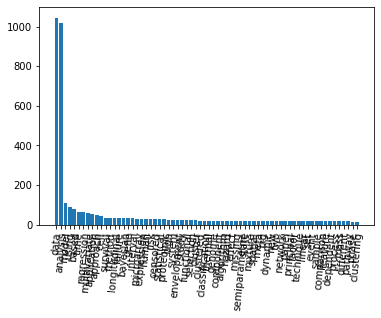

In [54]:
#matplotlib.pylot 을 사용한 히스토그램 


sorted_Keys = sorted(word_count, key = word_count.get, reverse=True)
# word_count 딕셔너리에서 x축 값으로 사용할 sorted_Keys 역순 정렬
sorted_Values = sorted(word_count.values(), reverse=True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
# 텍스트 가운데로 정렬하며 히스토그램 bar 설정
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
# x축에 들어갈 눈금값 설정 
'''
xticks(ticks, labels,size,rotation...)
ticks : x축에 표시할 눈금 값
labels : 눈금값의 정해주는 이름, 지정하면 그 이름이 축에 나타남
rotation : ticks의 각도 설정
'''


plt.show()


# Data Visualization

In [57]:
# 'Data analysis' 영어 학술문서 제목의 키워드 분석을 위해 연도별 학술문서의 수를 추출, 워드클라우드 생성

all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일',as_index = False)['doc_count'].count()
# doc_count(출판일 별 갯수) 컬럼 생성
# 출판일 컬럼을 기준으로 그룹 생성하여 doc_count 컬럼에 넣음, 그룹 라벨 index는 사용 x

summary_year 

,출판일,doc_count
0,1935,1
1,1936,1
2,1992,6
3,1993,10
4,1994,2
5,1995,10
6,1996,9
7,1997,5
8,1998,7
9,1999,7


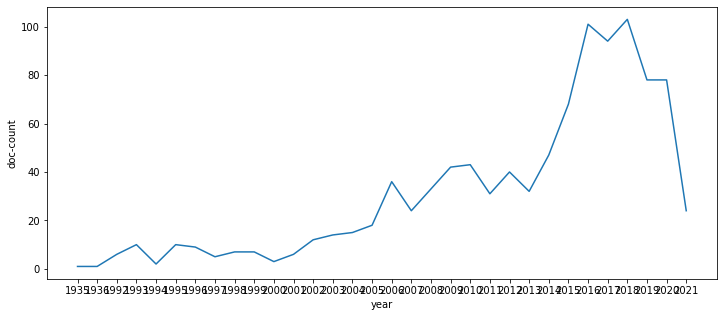

In [58]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
# plt.grid(True) 그리드 설정 가능
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)),[text for text in summary_year['출판일']])
plt.show()

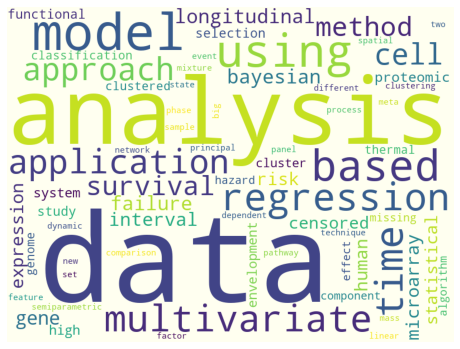

In [59]:
stopwords = set(STOPWORDS) # 불용어 설정
wc = WordCloud(background_color= 'ivory', stopwords=stopwords, width=800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize= (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()